In [28]:
from pylab import *
from numba import njit
from scipy.special import *
from scipy.optimize import *

In [2]:
@njit
def raiz_newton(num, error = 1e-8):
    x0 , diferencia = num , 1 
    while diferencia > error:
        x_old = x0
        x0 = 0.5*(x0 + num/x0)
        diferencia = abs(x0 - x_old) 
    return x0

In [3]:
%%timeit
raiz_newton(57)

136 ns ± 0.269 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [4]:
raiz_newton(57)

7.54983443527075

In [5]:
%%timeit
sqrt(57)

418 ns ± 0.837 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [6]:
sqrt(57)

7.54983443527075

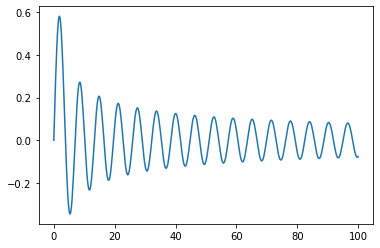

In [48]:
x = linspace(0,100,500)
y = jv(1,x)
plot(x,y)
show()

In [56]:
def filtrar(x,y):
    filtro = []
    for i in range(len(x)-1):
        if y[i]*y[i+1] < 0:
            filtro.append(x[i])    
    return filtro

def raices_todas_bessel(func,x0i,orden):
    raices = np.zeros(len(x0i))
    for i in range(len(x0i)):
        raices[i] = newton(lambda var: func(orden,var),x0i[i])
    return raices

def buscar_raices_Bessel(func,dom_span,orden):
    dominio = linspace(dom_span[0],dom_span[1])
    contradominio = func(orden,dominio)
    x0s_iniciales = filtrar(dominio,contradominio)
    raices = raices_todas_bessel(func,x0s_iniciales,orden)
    return raices

In [57]:
fil = todos_zeros(x,y)
raices_bessel = raices_todas_bessel(jv,fil,1)

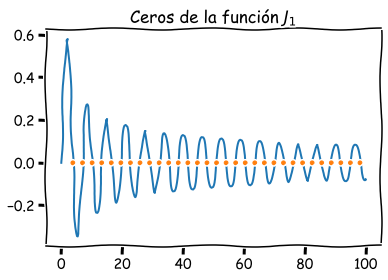

In [52]:
x = linspace(0,100,500)
y = jv(1,x)
with xkcd():
    title(r"Ceros de la función $J_1$")
    plot(x,y)
    plot(raices_bessel,np.zeros(len(raices_bessel)),'.')
show()

In [60]:
buscar_raices_Bessel(jv,[5,70],0)

array([ 5.52007811,  8.65372791, 11.79153444, 14.93091771, 18.07106397,
       21.21163663, 24.35247153, 27.49347913, 30.63460647, 33.77582021,
       36.91709835, 40.05842576, 43.19979171, 46.34118837, 49.4826099 ,
       52.62405184, 55.76551076, 58.90698393, 62.04846919, 65.1899648 ,
       68.33146933])

In [61]:
%%timeit
buscar_raices_Bessel(jv,[5,70],0)

1.4 ms ± 2.27 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
